Valeurs uniques dans y: ['1' '2' '3' '4' '5' 'M']
Accuracy of KNN: 52.94%
Accuracy of XGBoost: 57.84%
Accuracy of GNB: 57.84%
Accuracy of CLF: 49.02%


c:\Users\theob\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


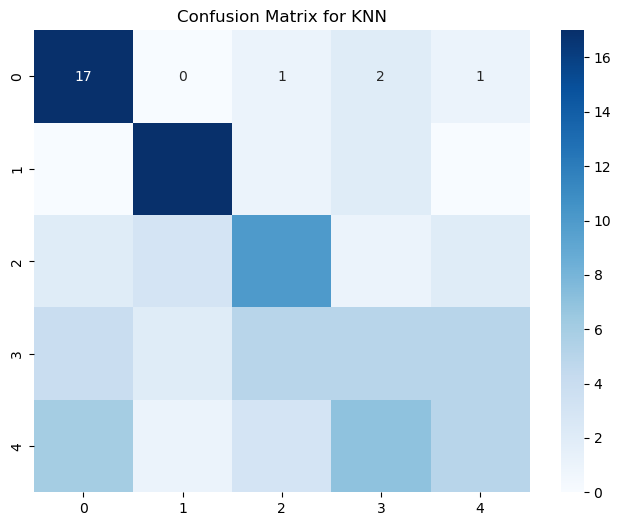

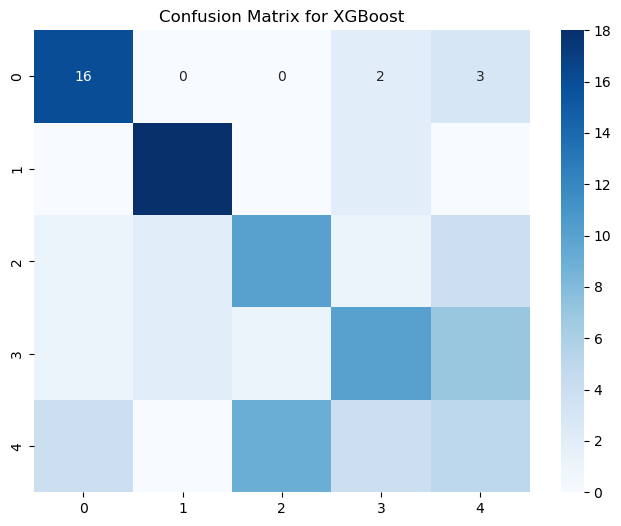

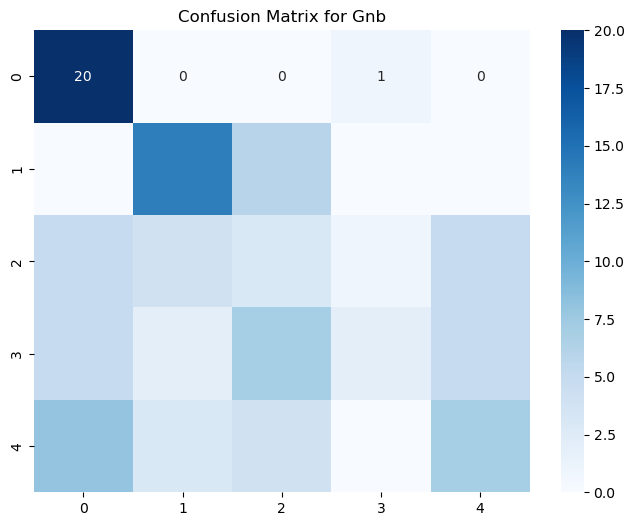

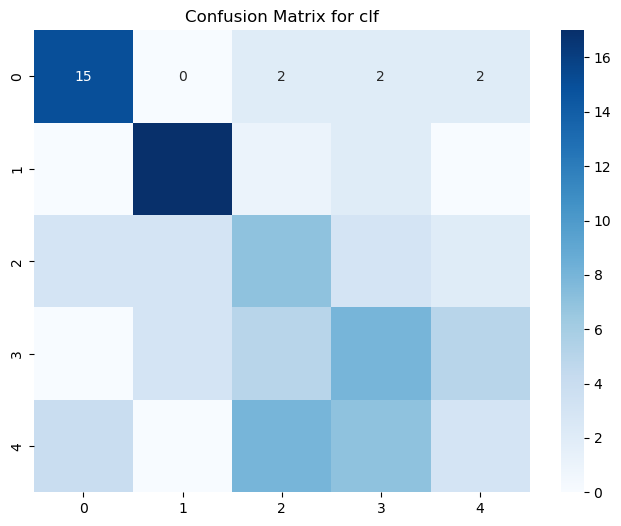

In [2]:
# Bibliothèques pour KNN et XGBoost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Chargement des données et prétraitement
data = pd.read_csv('Mine_Dataset.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Vérifier les valeurs uniques dans y pour identifier les non-numériques
print("Valeurs uniques dans y:", np.unique(y))

# Filtrage des lignes avec des valeurs non-numériques dans y
import re
def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Filtre pour ne garder que les lignes avec des valeurs numériques dans y
mask = np.array([is_number(val) for val in y])
X = X[mask]
y = y[mask]

# Conversion des valeurs de y en entiers après avoir filtré
y = y.astype(float).astype(int)

# Correction : on réajuste les classes (y commence à 1, on la réajuste pour commencer à 0)
y = y - 1

# Séparation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Création des modèles de Machine Learning

# (A) K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# (B) XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Paramètres spécifiques à XGBoost
xgb.fit(X_train_scaled, y_train)

# (C) Naives Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# (D) Decision Tree 
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)


# 4. Prédictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_clf = clf.predict(X_test_scaled)

# 5. Évaluation des performances
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_gnb = accuracy_score(y_test, y_pred_xgb)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

print(f'Accuracy of KNN: {accuracy_knn * 100:.2f}%')
print(f'Accuracy of XGBoost: {accuracy_xgb * 100:.2f}%')
print(f'Accuracy of GNB: {accuracy_gnb * 100:.2f}%')
print(f'Accuracy of CLF: {accuracy_clf * 100:.2f}%')

# 6. Affichage des matrices de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for KNN')
plt.show()

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for XGBoost')
plt.show()

# GNB Confusion Matrix 
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Gnb')
plt.show()

# CLF Confusion Matrix 
cm_clf = confusion_matrix(y_test, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for clf')
plt.show()